In [222]:
from music21 import * #import the score

In [223]:
path = './SemesterProject/' #name of folder where the score is saved

file_name = 'NahawandUdIslamAlQasabgy.musicxml' #name of the score

fn = path + file_name #get the full path 

print(fn)

./SemesterProject/NahawandUdIslamAlQasabgy.musicxml


In [224]:
s = converter.parse(fn)

In [225]:
s.show()

In [226]:
print("This score contatins {} elements:".format(len(s.elements))) #how many elements are contained in the score
print()


for element in s.elements: #print every element
    print(element)

This score contatins 5 elements:

<music21.text.TextBox "Nahawand -...">
<music21.text.TextBox "Played by ...">
<music21.stream.Part Piano>
<music21.layout.ScoreLayout>


In [227]:
p = s.parts.stream() #saving part stream


print("This score containts {} part, the instrumental part:".format(len(p.elements))) #print how many elements are contained
print()


for element in p.elements: #print part
    print(element)

This score containts 1 part, the instrumental part:

<music21.stream.Part Piano>


In [228]:
p_instr = p[0] #instrumental part

p_instr.show() #open in musescore

In [229]:
print("The score contains {} elements.".format(len(p_instr.elements))) #call .elements attribute to see how many elements are in the score

mm_score = p_instr.getElementsByClass('Measure').stream() #see how many measures the score has...

print("The score contains {} measures.".format(len(mm_score.elements))) #and print it

The score contains 121 elements.
The score contains 102 measures.


In [230]:
#but how many notes are in the score? Let's see...

nn_score = [] #defining an empty variable

#loop over every measure in the score
for m in mm_score:
    nn = m.notes.stream()
    # Loop over all the notes of this particular measure
    for n in nn:
        # Append the note to the empty list
        nn_score.append(n)
        
print('The score contains {} notes.'.format(len(nn_score)))

The score contains 743 notes.


In [231]:
nn_score = p_instr.flat.notes.stream() #'flatten' the substreams so no need to iterate over them

print("The score contains {} notes.".format(len(nn_score)))

The score contains 743 notes.


In [232]:
nn_score.show()

In [233]:
#find out what the scale is - how many c, db, d, eb, e, f, gb, g, ab, a, bb, b

nr_score = p_instr.flat.notesAndRests.stream() #retrieve notes and rests

#I'll do a pitch analysis of the score to find out how many of which pitch the score contains

pitch_count = {} #creating empty dictionary

for n in nr_score: #iterating over all notes and rests
    if n.isNote: #checking if element is a note
        n_pitch = n.nameWithOctave #get the pitch name with the octave
        n_dur = n.quarterLength #get the duration 
        if n_pitch not in pitch_count.keys(): #checking if the pitch of the current note is not yet in our counted keys of the dictionary
            pitch_count[n_pitch] = n_dur #add the pitch as key with initial value of the duration
        else: #update the value by adding the duration of the current note
            pitch_count[n_pitch] += n_dur


#print the results by iterating over the dictionary's keys 
print("The notes used in the score are the following:")
for k in pitch_count.keys():
    print("- {}: {}".format(k, pitch_count[k]))


The notes used in the score are the following:
- D4: 47.0
- D-4: 37.375
- B3: 39.0
- A3: 1.0
- B-3: 6.5
- E4: 50.625
- G-3: 6.375
- E-4: 1.5
- G-4: 64.5
- E3: 2.25
- A4: 10.0
- A-3: 1.5
- F4: 0.5
- G4: 26.75
- G3: 1.75
- B4: 32.0
- D5: 11.5
- D-5: 13.25
- A-4: 0.5
- B-4: 12.5
- G-5: 2.5
- E5: 3.0
- F5: 0.0
- E-5: 0.5
- C5: 0.5


In [234]:
import matplotlib.pyplot as plt #import pyplot to then create a bar chart

In [235]:
sorted_durations = sorted(pitch_count.values()) #first, sort the durations so the table will be better readable
print("The sorted durations are: {}".format(sorted_durations)) #print sorted durations

The sorted durations are: [0.0, 0.5, 0.5, 0.5, 0.5, 1.0, 1.5, 1.5, 1.75, 2.25, 2.5, 3.0, 6.375, 6.5, 10.0, 11.5, 12.5, 13.25, 26.75, 32.0, 37.375, 39.0, 47.0, 50.625, 64.5]


In [236]:
#create empty dictionary for midi values
pitch_midi = {}

for pitch_name in pitch_count.keys(): #iterate over the durations of the pitch_count dictionary
    pitch_object = pitch.Pitch(pitch_name) #create a pitch object using the current pitch name
    midi_value = pitch_object.midi #get midi value
    pitch_midi[midi_value] = pitch_name #add midi value as key in the new dictionary & the pitch name as value
    
print(pitch_midi) #print the dictionary

{62: 'D4', 61: 'D-4', 59: 'B3', 57: 'A3', 58: 'B-3', 64: 'E4', 54: 'G-3', 63: 'E-4', 66: 'G-4', 52: 'E3', 69: 'A4', 56: 'A-3', 65: 'F4', 67: 'G4', 55: 'G3', 71: 'B4', 74: 'D5', 73: 'D-5', 68: 'A-4', 70: 'B-4', 78: 'G-5', 76: 'E5', 77: 'F5', 75: 'E-5', 72: 'C5'}


In [237]:
from collections import OrderedDict #since dictionaries are never put in order, I import an ordered dictionary

#I want to have a graph with the least to most used pitches, so i order my dictionary like this
sorted_pitch_count = OrderedDict([(k,v) for k, v in sorted(pitch_count.items(), key=lambda item: item[1])]) #filling my dictionary with the right order of pitches and values, so the note names will fit with the placement of the plots 

In [238]:
sorted_durations = sorted_pitch_count.values() #get the values sorted by least to most used
sorted_pitches = sorted_pitch_count.keys() #get the right order of pitch names

print(sorted_durations) #print the ordered dictionaries to check
print(sorted_pitches)


odict_values([0.0, 0.5, 0.5, 0.5, 0.5, 1.0, 1.5, 1.5, 1.75, 2.25, 2.5, 3.0, 6.375, 6.5, 10.0, 11.5, 12.5, 13.25, 26.75, 32.0, 37.375, 39.0, 47.0, 50.625, 64.5])
odict_keys(['F5', 'F4', 'A-4', 'E-5', 'C5', 'A3', 'E-4', 'A-3', 'G3', 'E3', 'G-5', 'E5', 'G-3', 'B-3', 'A4', 'D5', 'B-4', 'D-5', 'G4', 'B4', 'D-4', 'B3', 'D4', 'E4', 'G-4'])


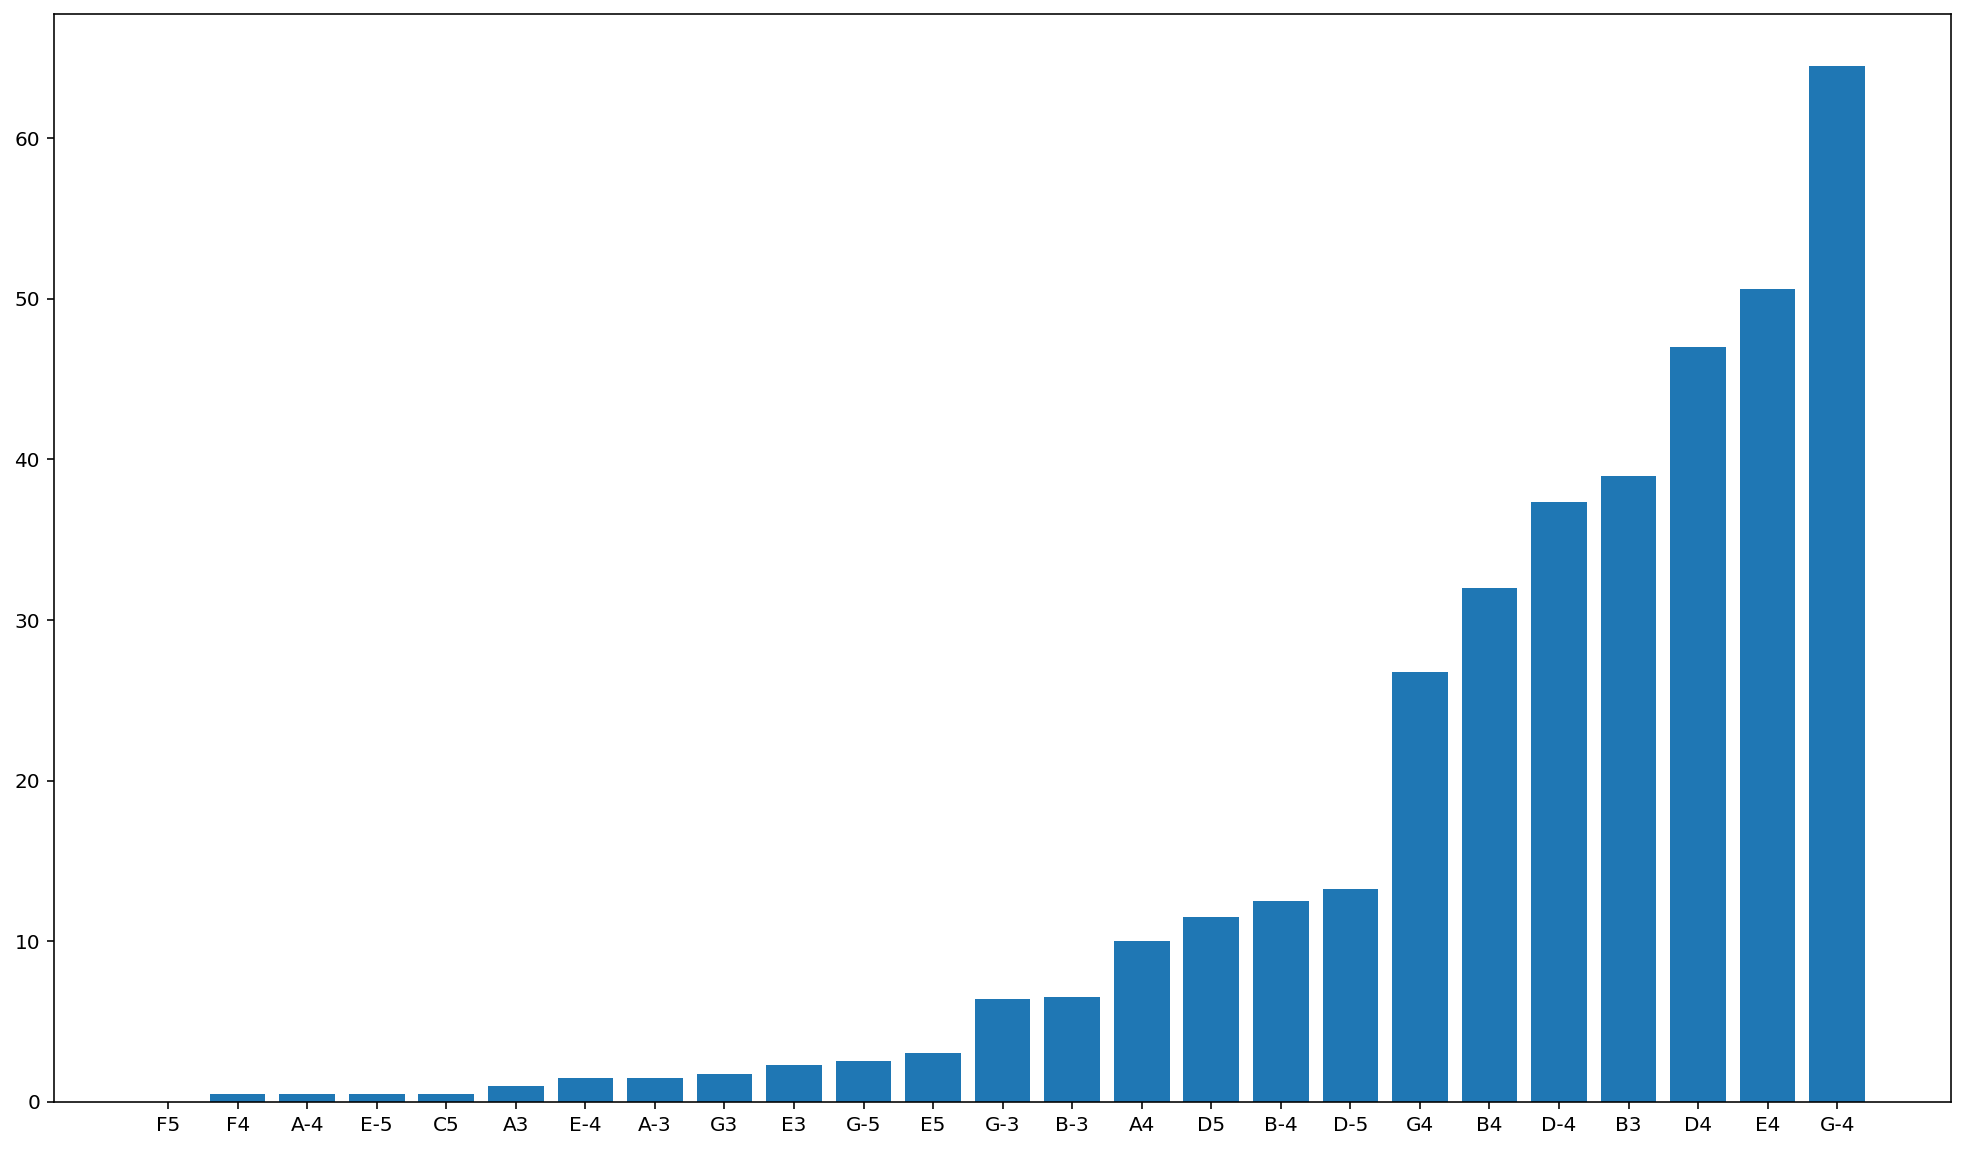

In [239]:
#now I can make my graph

plt.figure(figsize=(17,10)) #define size of the graph so everything is well readable
plt.bar(sorted_pitches, sorted_durations) #initiate the bar chart
plt.show() #close and display the plot

#now I know which notes are played how often. 

In [309]:
#now I will analyse which intervals are played how often
#for that, I have to create an interval object, which I do by using the first two notes of the score. 

n1 = nn_score[0]
n2 = nn_score[1]
n3 = nn_score[2] #defining the next notes for later creating the bar chart of the interval analysis
n4 = nn_score[3]
n5 = nn_score[4]
n6 = nn_score[5]
n7 = nn_score[32]
n8 = nn_score[33]
n9 = nn_score[45]
n10 = nn_score[46]
n11 = nn_score[47]
n12 = nn_score[48]
n13 = nn_score[50]
n14 = nn_score[51]
n15 = nn_score[58]
n16 = nn_score[59]
n17 = nn_score[234]
n18 = nn_score[235]
n19 = nn_score[367]
n20 = nn_score[368]
n21 = nn_score[6]
n22 = nn_score[7]



#I print them to be able to check which interval the program should get me.
print("First note:", n1.nameWithOctave)
print("Second note:", n2.nameWithOctave)

First note: D4
Second note: D-4


In [328]:
itvl_1 = interval.Interval(n1, n2) #now I create an interval
print(itvl_1.name) #and print it #d1
#print()

#I want to get some more information about the first interval:
#print("Interval name:", itvl_1.name)
#print("Interval 'nice' name:", itvl_1.niceName)
#print("Interval class:", itvl_1.intervalClass)
#print("Interval directed name:", itvl_1.directedName)
#print("Interval directed 'nice' name:", itvl_1.directedNiceName)
#print("Interval direction:", itvl_1.direction.name)
#print("Interval semitones:", itvl_1.semitones)
#print("Interval cents:", itvl_1.cents)
#print()
#print()

#create the other intervals which are in the score for creating the bar chart later
#and print them to check if they are right

itvl_11 = interval.Interval(n21, n22) #P1
print(itvl_11.name)
itvl_2 = interval.Interval(n13, n14) #m2
print(itvl_2.name)
itvl_3 = interval.Interval(n3, n4) #M2
print(itvl_3.name)                 
itvl_4 = interval.Interval(n11, n12) #m3
print(itvl_4.name)
itvl_5 = interval.Interval(n10, n11) #M3
print(itvl_5.name)
itvl_6 = interval.Interval(n7, n8) #P4
print(itvl_6.name)
itvl_7 = interval.Interval(n9, n10) #P5
print(itvl_7.name)
itvl_8 = interval.Interval(n17, n18) #M6
print(itvl_8.name)
itvl_9 = interval.Interval(n19, n20) #m7
print(itvl_9.name)
itvl_10 = interval.Interval(n15, n16) #P8
print(itvl_10.name)




#itvl_12 = interval.Interval(n2, n3) 

d1
P1
m2
M2
m3
M3
P4
P5
M6
m7
P8


In [326]:
#I will look how many of which intervals are contained in the score. Therefore I create counters

d1_counter = 0
P1_counter = 0
m2_counter = 0
M2_counter = 0
m3_counter = 0
M3_counter = 0
P4_counter = 0
d5_counter = 0
P5_counter = 0
m6_counter = 0
M6_counter = 0
m7_counter = 0
P8_counter = 0

for i in range(len(nn_score)-1): #iterating over the indexes of the notes until the penultimate one
    n_start = nn_score[i] #note in the current index
    n_end = nn_score[i+1] #note in the following index
    itvl = interval.Interval(n_start, n_end) #create an interval between the two notes
    if itvl.name == 'd1': #checking if name of the interval is a diminished unison - I do this for every interval
        d1_counter += 1 #update counter - also doing this for every interval
        itvl.noteStart.style.color = 'violet' #changing the color of the starting notes of intervals, so no color will overlap another
    elif itvl.name == 'P1':
        P1_counter += 1
        itvl.noteStart.style.color = 'brown'
    elif itvl.name == 'm2':
        m2_counter += 1
        itvl.noteStart.style.color = 'blue'
    elif itvl.name == 'M2':
        M2_counter += 1
        itvl.noteStart.style.color = 'green'  
    elif itvl.name == 'm3':
        m3_counter += 1
        itvl.noteStart.style.color = 'yellow'
    elif itvl.name == 'M3':
        M3_counter += 1
        itvl.noteStart.style.color = 'grey'
    elif itvl.name == 'P4':
        P4_counter += 1
        itvl.noteStart.style.color = 'red'
    elif itvl.name == 'd5':
        d5_counter += 1
    elif itvl.name == 'P5':
        P5_counter += 1
        itvl.noteStart.style.color = 'purple'
    elif itvl.name == 'm6':
        m6_counter += 1
    elif itvl.name == 'M6':
        M6_counter += 1
        itvl.noteStart.style.color = 'turquoise'
    elif itvl.name == 'm7':
        m7_counter += 1
        itvl.noteStart.style.color = 'pink'
    elif itvl.name == 'P8':
        P8_counter += 1
        itvl.noteStart.style.color = 'orange'
        
print("The score contains {} diminished unisons.".format(d1_counter)) #print results
print("The score contains {} perfect unisons.".format(P1_counter)) #I will show them in the graph, because they show that some notes are repeated very often without any other interval in between. When you look at the score, you can see that the brown colored notes are probably important ones in the piece.
print("The score contains {} minor seconds.".format(m2_counter))
print("The score contains {} major seconds.".format(M2_counter))
print("The score contains {} minor thirds.".format(m3_counter))
print("The score contains {} major thirds.".format(M3_counter))
print("The score contains {} perfect fourths.".format(P4_counter))
print("The score contains {} diminished fifths.".format(d5_counter))
print("The score contains {} perfect fifths.".format(P5_counter))
print("The score contains {} minor sixths.".format(m6_counter))
print("The score contains {} major sixths.".format(M6_counter))
print("The score contains {} minor sevenths.".format(m7_counter))
print("The score contains {} perfect octaves.".format(P8_counter))

nn_score.show() #show the score

The score contains 99 diminished unisons.
The score contains 197 perfect unisons.
The score contains 10 minor seconds.
The score contains 112 major seconds.
The score contains 39 minor thirds.
The score contains 12 major thirds.
The score contains 10 perfect fourths.
The score contains 0 diminished fifths.
The score contains 8 perfect fifths.
The score contains 0 minor sixths.
The score contains 1 major sixths.
The score contains 1 minor sevenths.
The score contains 19 perfect octaves.


In [327]:
#now that I know how many of each interval are contained in the score, I will make a graph
#since there are no diminished fifths and minor sixth in the score, I won't show them in the graph

#first, I create a list for the names of the intervals and the counters in the right order
interval_nicenames = [itvl_11.niceName, itvl_3.niceName, itvl_1.niceName, itvl_4.niceName, itvl_10.niceName, itvl_5.niceName, itvl_2.niceName, itvl_6.niceName, itvl_7.niceName, itvl_8.niceName, itvl_9.niceName]
all_counters = [P1_counter, M2_counter, d1_counter, m3_counter, P8_counter, M3_counter, m2_counter, P4_counter, P5_counter, M6_counter, m7_counter]

print(interval_nicenames)
print(all_counters) #checking if it works

['Perfect Unison', 'Major Second', 'Diminished Unison', 'Minor Third', 'Perfect Octave', 'Major Third', 'Minor Second', 'Perfect Fourth', 'Perfect Fifth', 'Major Sixth', 'Minor Seventh']
[197, 112, 99, 39, 19, 12, 10, 10, 8, 1, 1]


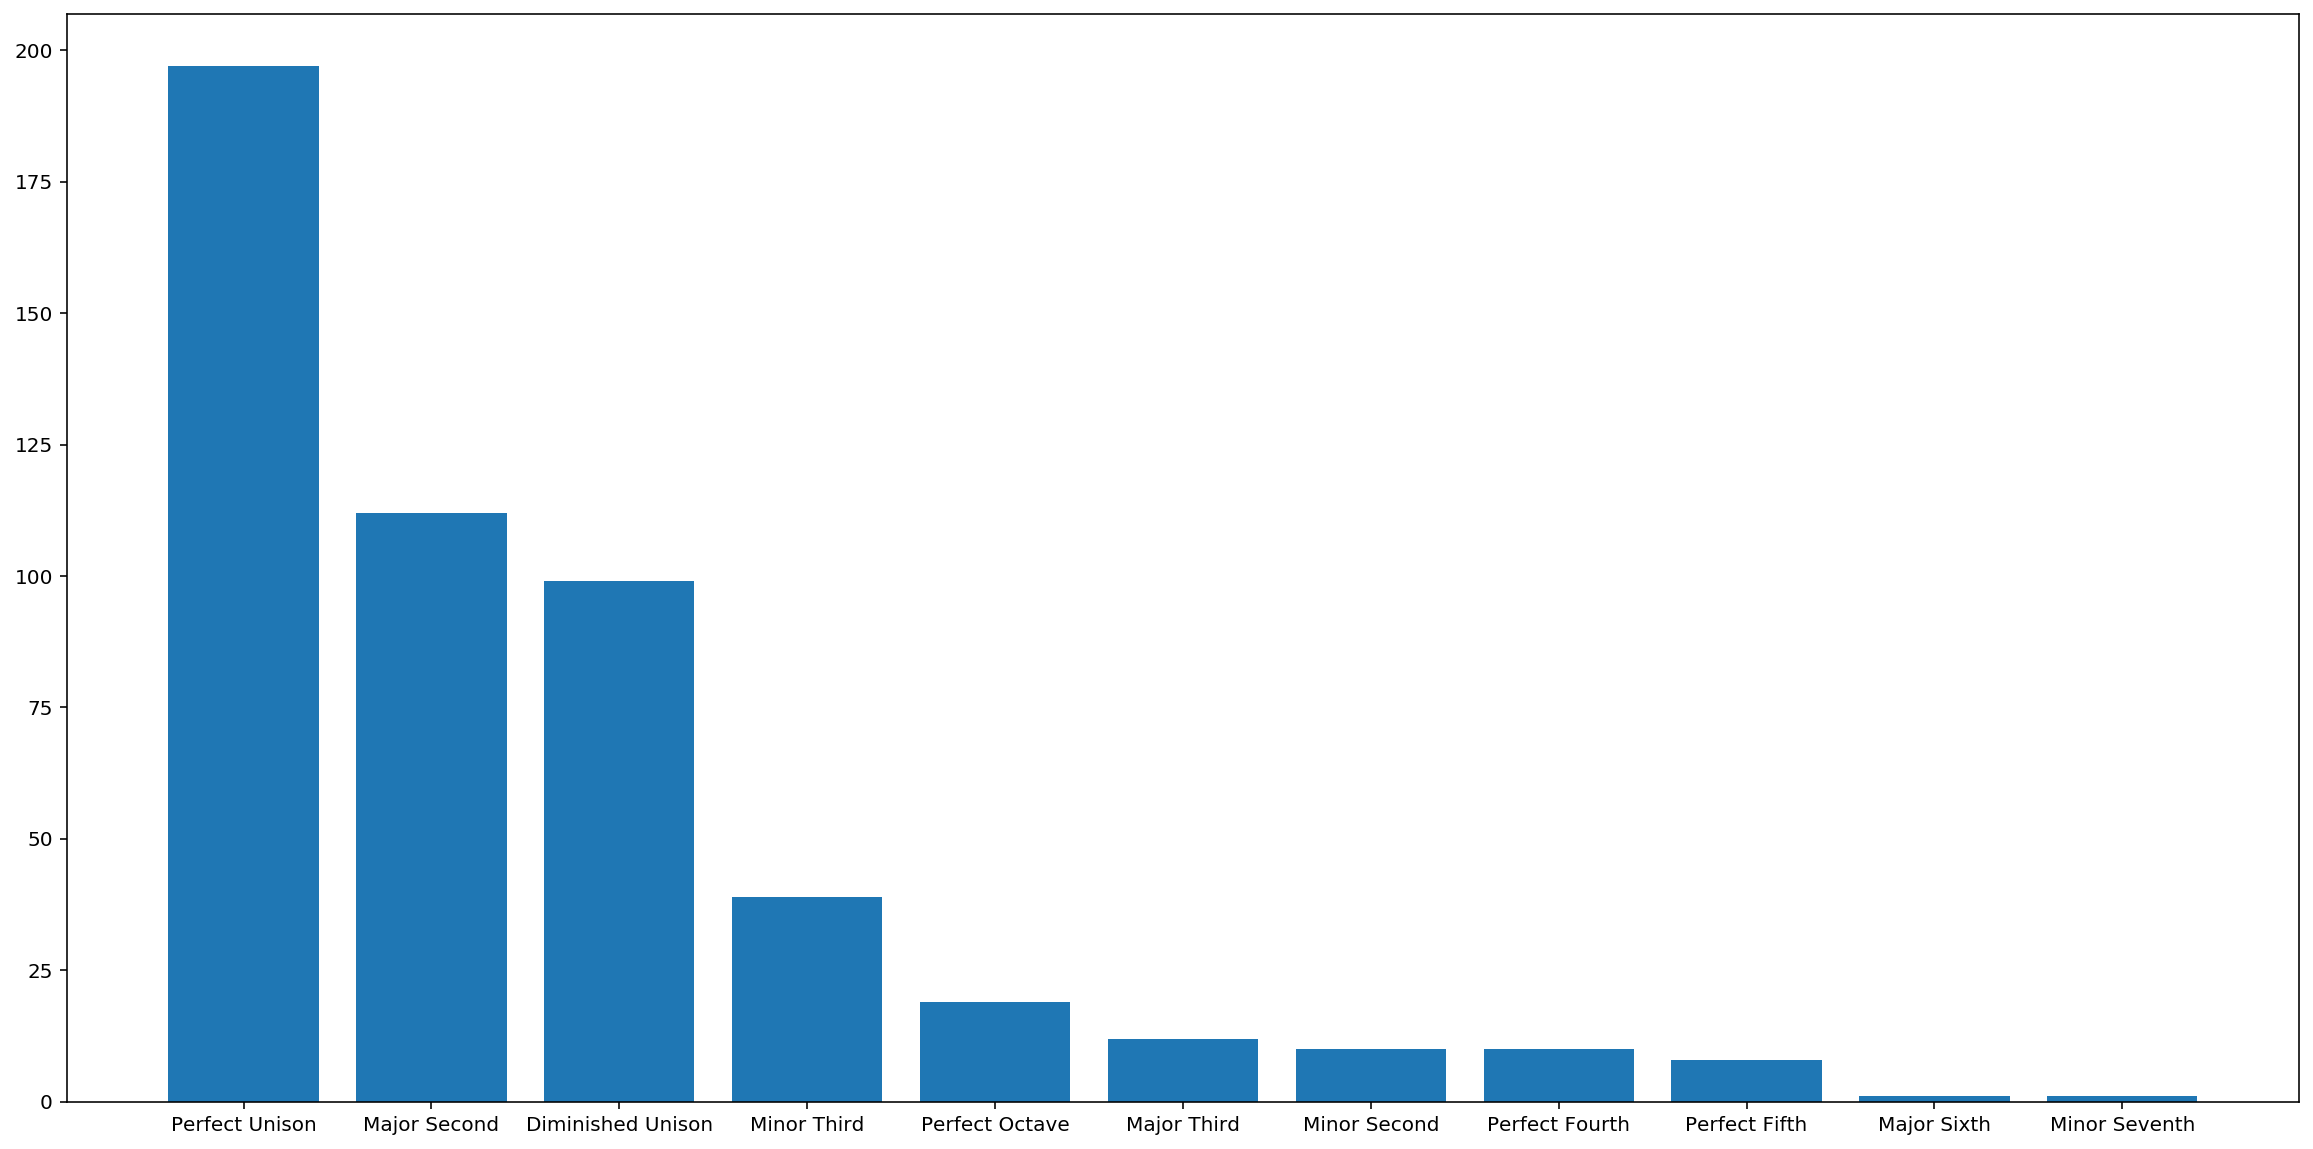

In [321]:
plt.figure(figsize=(20,10)) #define size of the graph so everything is well readable
plt.bar(interval_nicenames, all_counters) #initiate the bar chart
plt.show() #close and display the plot